# Data Dive 3 - Video Game Sales Data
## By: Robert, William, and Mark
## Due: 4/06/21

together we decided to look at the various relationships found in basic sales data such as regional sales, console, genre, and publisher and see what insights we could find.

# What Is The End Goal: Find valuable insights into video game sales data as it relates to console, genre, and publisher, AND use those insights to develop an effective predictive model to predict sales.


# NOTE: There is a large section of code commented out that runs the GridSearch algorithm to fit our LASSO Regressions models. Since we developed 4 models, running 4 GridSearches seemed like an unwise way to bog down the run-time of this notebook. Feel free to uncomment them and re-run the notebook, but for ease-of-rerunning the code, we have commented those cells out.

# What is Our Data: Video Game Sales From vgchartz.com (> 100,000 Units Sold)
#### Source: https://www.kaggle.com/gregorut/videogamesales

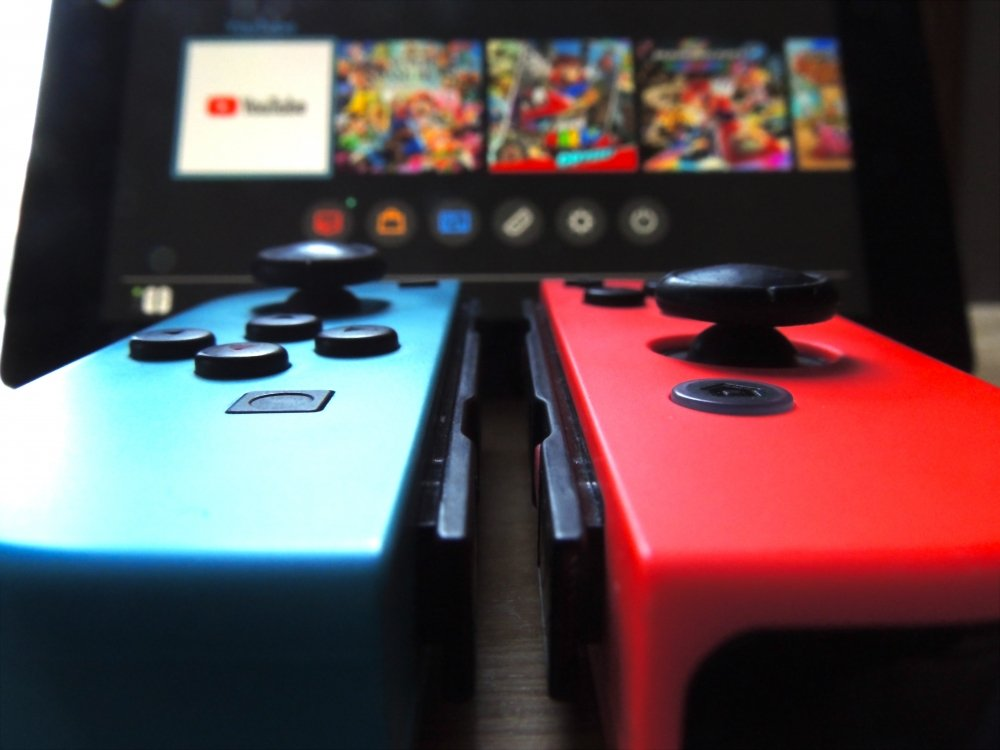

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go 
%matplotlib inline

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings

import missingno as msn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import scipy.sparse as sp
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Part 1 - Data Cleaning / Feature Engineering - William

### Importing Data

In [2]:
### Do not need to load from csv, but if you want to load our copy, run this code:
df_vg_sales = pd.read_csv("vgsales.csv")

In [3]:
df_vg_sales.head(20)

Rank                                          Name Platform    Year  \
0      1                                    Wii Sports      Wii  2006.0   
1      2                             Super Mario Bros.      NES  1985.0   
2      3                                Mario Kart Wii      Wii  2008.0   
3      4                             Wii Sports Resort      Wii  2009.0   
4      5                      Pokemon Red/Pokemon Blue       GB  1996.0   
5      6                                        Tetris       GB  1989.0   
6      7                         New Super Mario Bros.       DS  2006.0   
7      8                                      Wii Play      Wii  2006.0   
8      9                     New Super Mario Bros. Wii      Wii  2009.0   
9     10                                     Duck Hunt      NES  1984.0   
10    11                                    Nintendogs       DS  2005.0   
11    12                                 Mario Kart DS       DS  2005.0   
12    13                   Pokemon Gold/Pokemon Silver       GB  1999.0   
13    14                                       Wii Fit      Wii  2007.0   
14    15                                  Wii Fit Plus      Wii  2009.0   
15    16                            Kinect Adventures!     X360  2010.0   
16    17                            Grand Theft Auto V      PS3  2013.0   
17    18                 Grand Theft Auto: San Andreas      PS2  2004.0   
18    19                             Super Mario World     SNES  1990.0   
19    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005.0   

           Genre               Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Sports                Nintendo     41.49     29.02      3.77   
1       Platform                Nintendo     29.08      3.58      6.81   
2         Racing                Nintendo     15.85     12.88      3.79   
3         Sports                Nintendo     15.75     11.01      3.28   
4   Role-Playing                Nintendo     11.27      8.89     10.22   
5         Puzzle                Nintendo     23.20      2.26      4.22   
6       Platform                Nintendo     11.38      9.23      6.50   
7           Misc                Nintendo     14.03      9.20      2.93   
8       Platform                Nintendo     14.59      7.06      4.70   
9        Shooter                Nintendo     26.93      0.63      0.28   
10    Simulation                Nintendo      9.07     11.00      1.93   
11        Racing                Nintendo      9.81      7.57      4.13   
12  Role-Playing                Nintendo      9.00      6.18      7.20   
13        Sports                Nintendo      8.94      8.03      3.60   
14        Sports                Nintendo      9.09      8.59      2.53   
15          Misc  Microsoft Game Studios     14.97      4.94      0.24   
16        Action    Take-Two Interactive      7.01      9.27      0.97   
17        Action    Take-Two Interactive      9.43      0.40      0.41   
18      Platform                Nintendo     12.78      3.75      3.54   
19          Misc                Nintendo      4.75      9.26      4.16   

    Other_Sales  Global_Sales  
0          8.46         82.74  
1          0.77         40.24  
2          3.31         35.82  
3          2.96         33.00  
4          1.00         31.37  
5          0.58         30.26  
6          2.90         30.01  
7          2.85         29.02  
8          2.26         28.62  
9          0.47         28.31  
10         2.75         24.76  
11         1.92         23.42  
12         0.71         23.10  
13         2.15         22.72  
14         1.79         22.00  
15         1.67         21.82  
16         4.14         21.40  
17        10.57         20.81  
18         0.55         20.61  
19         2.05         20.22

## Data Dictionary

#### Rank - Ranking of overall sales

#### Name - The games name

#### Platform - Platform of the games release (i.e. PC,PS4, etc.)

#### Year - Year of the game's release

#### Genre - Genre of the game

#### Publisher - Publisher of the game

#### NA_Sales - Sales in North America (in millions)

#### EU_Sales - Sales in Europe (in millions)

#### JP_Sales - Sales in Japan (in millions)

#### Other_Sales - Sales in the rest of the world (in millions)

#### Global_Sales - Total worldwide sales.

In [4]:
df_vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df_vg_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

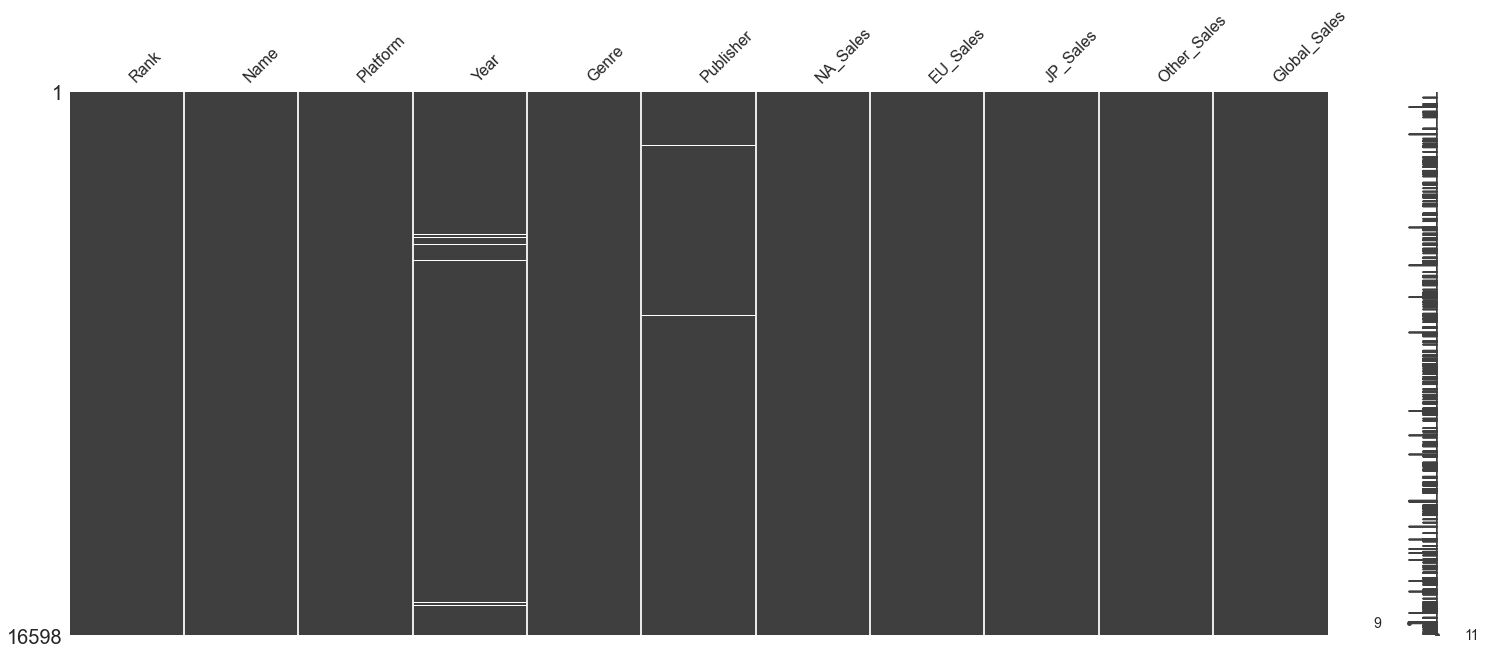

In [6]:
msn.matrix(df_vg_sales);

In [7]:
df_vg_sales.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [8]:
#Trying to smart fill by grouping
df_vg_sales["Year"] = df_vg_sales["Year"].fillna(df_vg_sales.groupby(["Platform", "Publisher", "Genre"])["Year"].transform('mean'))

#Filling Remaining Unique Platform/Publisher/Genre Combos Year W/ Avg Year of VideoGame Releases
mean_year = df_vg_sales['Year'].mean()
df_vg_sales['Year'].fillna(value=mean_year, inplace=True)

#Changing Year To An Int for DataViz Purposes
df_vg_sales['Year'] = df_vg_sales['Year'].apply(np.int64)

#Checking Null_Counts For Year To Verify That It's 0
df_vg_sales.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

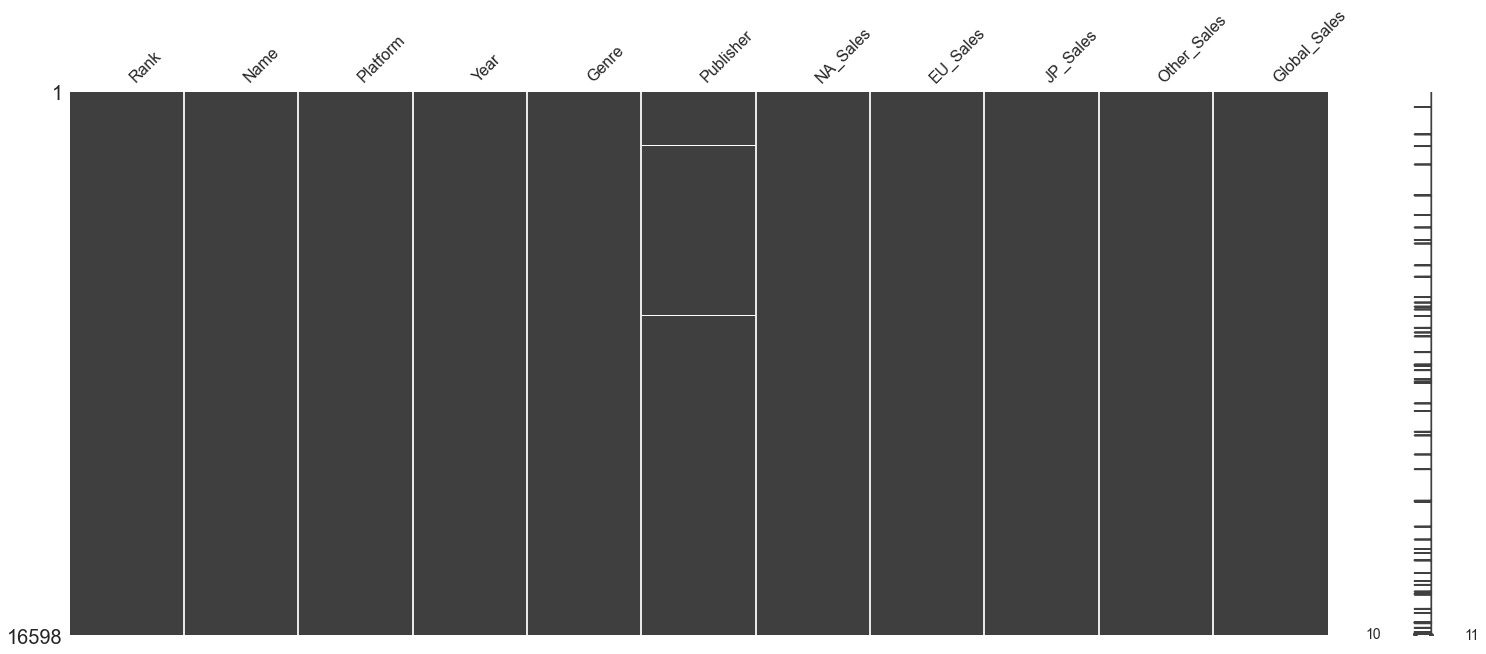

In [9]:
msn.matrix(df_vg_sales);

In [10]:
#Sets up a cleaned df w/ no nulls
df_vg_sales_drop = df_vg_sales.dropna()
df_vg_sales_drop.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

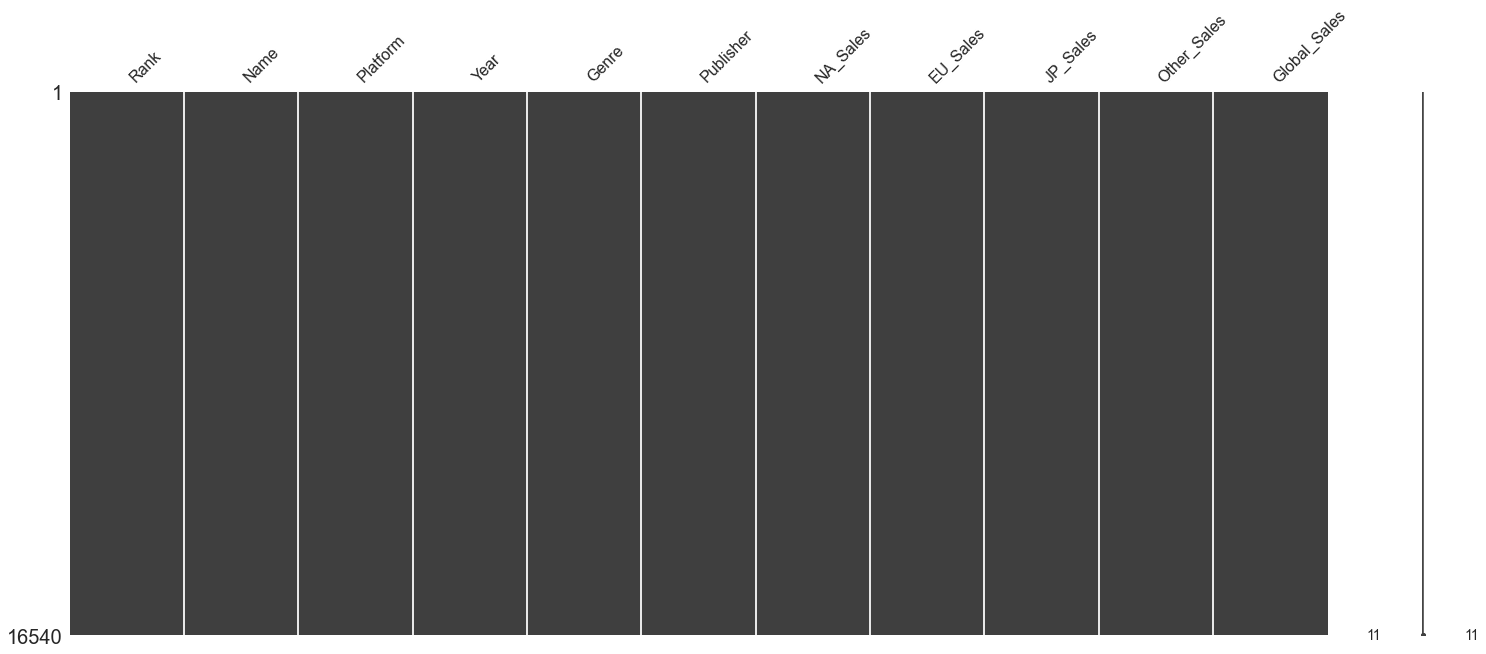

In [11]:
#Shows that nulls don't exist in this new dataframe
msn.matrix(df_vg_sales_drop);

In [12]:
df_vg_sales_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  int64  
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [13]:
df_vg_sales_drop.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16540.000000  16540.000000  16540.000000  16540.000000  16540.000000   
mean    8294.197642   2006.394559      0.265079      0.146883      0.077998   
std     4790.703200      5.846160      0.817929      0.506129      0.309800   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4143.750000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12440.250000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16540.000000  16540.000000  
mean       0.048191      0.538426  
std        0.188879      1.557424  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [14]:
#splicing Mario titles into its own dataframe
df_mario = df_vg_sales_drop[(df_vg_sales_drop['Name'].str.contains('Mario '))]

df_mario.sample(5)

Rank                    Name Platform  Year     Genre Publisher  \
700    702             Mario Bros.      NES  1983  Platform  Nintendo   
1738  1740   Mario vs. Donkey Kong      GBA  2004    Puzzle  Nintendo   
164    165       Super Mario World      GBA  2001  Platform  Nintendo   
581    582  Mario Strikers Charged      Wii  2007    Sports  Nintendo   
1144  1146    Super Mario Strikers       GC  2005    Sports  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
700       0.51      0.12      1.63         0.02          2.28  
1738      0.68      0.25      0.21         0.02          1.17  
164       3.21      1.11      0.95         0.20          5.46  
581       1.07      1.06      0.24         0.25          2.62  
1144      0.98      0.38      0.20         0.04          1.61

In [15]:
df_mario.describe()

Rank         Year    NA_Sales    EU_Sales    JP_Sales  \
count    103.000000   103.000000  103.000000  103.000000  103.000000   
mean    1956.796117  2004.145631    2.598835    1.240777    1.063107   
std     3324.070577     8.027414    4.136176    1.982055    1.317495   
min        2.000000  1982.000000    0.000000    0.000000    0.000000   
25%      149.500000  2000.000000    0.380000    0.115000    0.250000   
50%      685.000000  2005.000000    1.090000    0.480000    0.620000   
75%     1726.000000  2010.000000    3.175000    1.715000    1.260000   
max    16545.000000  2016.000000   29.080000   12.880000    6.810000   

       Other_Sales  Global_Sales  
count   103.000000    103.000000  
mean      0.283786      5.186214  
std       0.534968      7.387103  
min       0.000000      0.010000  
25%       0.020000      1.175000  
50%       0.100000      2.320000  
75%       0.280000      5.900000  
max       3.310000     40.240000

In [16]:
#splicing GTA titles into its own dataframe
df_gta = df_vg_sales_drop[(df_vg_sales_drop['Name'].str.contains('Grand Theft Auto'))]

df_gta.sample(5)

Rank                           Name Platform  Year   Genre  \
684    686               Grand Theft Auto       PS  1997  Action   
56      57            Grand Theft Auto IV      PS3  2008  Action   
6905  6907               Grand Theft Auto      GBA  2004  Action   
197    198             Grand Theft Auto V     XOne  2014  Action   
9827  9829  Grand Theft Auto: San Andreas     X360  2008  Action   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
684   Take-Two Interactive      0.79      1.35      0.04         0.14   
56    Take-Two Interactive      4.76      3.76      0.44         1.62   
6905  Take-Two Interactive      0.17      0.06      0.00         0.00   
197   Take-Two Interactive      2.66      2.01      0.00         0.41   
9827  Take-Two Interactive      0.08      0.03      0.00         0.01   

      Global_Sales  
684           2.32  
56           10.57  
6905          0.24  
197           5.08  
9827          0.12

In [17]:
df_gta.describe()

Rank         Year   NA_Sales   EU_Sales   JP_Sales  \
count     28.000000    28.000000  28.000000  28.000000  28.000000   
mean    2626.464286  2006.000000   2.636071   1.956429   0.134643   
std     4445.791972     4.891413   3.151873   2.300409   0.223830   
min       17.000000  1997.000000   0.000000   0.010000   0.000000   
25%       55.750000  2003.000000   0.252500   0.475000   0.000000   
50%      652.000000  2005.500000   1.195000   0.855000   0.030000   
75%     2126.500000  2008.250000   4.040000   2.897500   0.180000   
max    16096.000000  2015.000000   9.630000   9.270000   0.970000   

       Other_Sales  Global_Sales  
count    28.000000     28.000000  
mean      1.045000      5.771071  
std       2.090757      6.657190  
min       0.000000      0.010000  
25%       0.080000      0.977500  
50%       0.220000      2.405000  
75%       1.320000     10.682500  
max      10.570000     21.400000

In [18]:
#splicing Pokemon titles into its own dataframe
df_poke = df_vg_sales_drop[(df_vg_sales_drop['Name'].str.contains('Pokemon'))]

df_poke.sample(5)

Rank                           Name Platform  Year         Genre  \
32      33            Pokemon X/Pokemon Y      3DS  2013  Role-Playing   
4044  4046            Pokemon Art Academy      3DS  2014          Misc   
20      21  Pokemon Diamond/Pokemon Pearl       DS  2006  Role-Playing   
5050  5052                Pokemon Channel       GC  2003     Adventure   
4        5       Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   

     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
32    Nintendo      5.17      4.05      4.34         0.79         14.35  
4044  Nintendo      0.18      0.12      0.16         0.03          0.49  
20    Nintendo      6.42      4.52      6.04         1.37         18.36  
5050  Nintendo      0.24      0.06      0.07         0.01          0.38  
4     Nintendo     11.27      8.89     10.22         1.00         31.37

In [19]:
df_poke.describe()

Rank         Year   NA_Sales   EU_Sales   JP_Sales  \
count     35.000000    35.000000  35.000000  35.000000  35.000000   
mean    1781.142857  2006.485714   2.259429   1.420286   1.841143   
std     2390.155215     5.299120   2.785379   2.065416   2.471488   
min        5.000000  1996.000000   0.000000   0.000000   0.000000   
25%       70.500000  2003.000000   0.400000   0.100000   0.320000   
50%     1141.000000  2006.000000   0.710000   0.380000   0.620000   
75%     2163.000000  2011.000000   3.705000   2.255000   3.110000   
max    10994.000000  2015.000000  11.270000   8.890000  10.220000   

       Other_Sales  Global_Sales  
count    35.000000     35.000000  
mean      0.263143      5.786000  
std       0.347773      7.579111  
min       0.000000      0.090000  
25%       0.035000      0.970000  
50%       0.080000      1.610000  
75%       0.400000      9.410000  
max       1.370000     31.370000

In [20]:
#Setting up a dataframe w/ our Mario, GTA, and Pokemon games only
df_multi_franch = pd.concat([df_mario,df_gta,df_poke])

df_multi_franch.sample(5)

Rank                              Name Platform  Year     Genre  \
16093  16096              Grand Theft Auto III       PC  2002    Action   
63        64                     Mario Kart 64      N64  1996    Racing   
429      430                 Super Mario Maker     WiiU  2015  Platform   
3822    3824          Mario Tennis: Power Tour      GBA  2005    Sports   
1441    1443  Grand Theft Auto: Chinatown Wars       DS  2009    Action   

                  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
16093  Take-Two Interactive      0.00      0.01      0.00         0.00   
63                 Nintendo      5.55      1.94      2.23         0.15   
429                Nintendo      1.18      0.87      0.93         0.20   
3822               Nintendo      0.24      0.09      0.19         0.01   
1441   Take-Two Interactive      0.59      0.57      0.05         0.14   

       Global_Sales  
16093          0.01  
63             9.87  
429            3.18  
3822           0.52  
1441           1.35

In [21]:
df_multi_franch.describe()

Rank         Year    NA_Sales    EU_Sales    JP_Sales  \
count    166.000000   166.000000  166.000000  166.000000  166.000000   
mean    2032.716867  2004.951807    2.533554    1.399337    1.070542   
std     3364.355631     7.115333    3.717595    2.059610    1.616954   
min        2.000000  1982.000000    0.000000    0.000000    0.000000   
25%      100.000000  2001.250000    0.360000    0.120000    0.175000   
50%      727.000000  2005.000000    1.045000    0.525000    0.440000   
75%     2080.250000  2010.000000    3.352500    1.977500    1.010000   
max    16545.000000  2016.000000   29.080000   12.880000   10.220000   

       Other_Sales  Global_Sales  
count   166.000000    166.000000  
mean      0.407831      5.411325  
std       1.000039      7.273644  
min       0.000000      0.010000  
25%       0.030000      0.997500  
50%       0.110000      2.230000  
75%       0.402500      7.335000  
max      10.570000     40.240000

In [22]:
#Transitioning our Cleaned DF back over to the original name for compatibility with other people's sections
df_vg_sales = df_vg_sales_drop

In [23]:
#Setting up a bunch of dummy variables in order to work w/ our Regression later

#Breaking platform into dummy vars
dummies_platform = pd.get_dummies(df_vg_sales['Platform'], prefix = "Platform", drop_first = False)
df_vg_sales = pd.concat([df_vg_sales, dummies_platform], axis = 1)
df_vg_sales = df_vg_sales.drop('Platform', axis = 1)

#Breaking genre into dummy vars
dummies_genre = pd.get_dummies(df_vg_sales['Genre'], prefix = "Genre", drop_first = False)
df_vg_sales = pd.concat([df_vg_sales, dummies_genre], axis = 1)
df_vg_sales = df_vg_sales.drop('Genre', axis = 1)

#Breaking publisher into dummy vars
dummies_publisher = pd.get_dummies(df_vg_sales['Publisher'], prefix = "Publisher", drop_first = False)
df_vg_sales = pd.concat([df_vg_sales, dummies_publisher], axis = 1)
df_vg_sales = df_vg_sales.drop('Publisher', axis = 1)

df_vg_sales.head()

Rank                      Name  Year  NA_Sales  EU_Sales  JP_Sales  \
0     1                Wii Sports  2006     41.49     29.02      3.77   
1     2         Super Mario Bros.  1985     29.08      3.58      6.81   
2     3            Mario Kart Wii  2008     15.85     12.88      3.79   
3     4         Wii Sports Resort  2009     15.75     11.01      3.28   
4     5  Pokemon Red/Pokemon Blue  1996     11.27      8.89     10.22   

   Other_Sales  Global_Sales  Platform_2600  Platform_3DO  Platform_3DS  \
0         8.46         82.74              0             0             0   
1         0.77         40.24              0             0             0   
2         3.31         35.82              0             0             0   
3         2.96         33.00              0             0             0   
4         1.00         31.37              0             0             0   

   Platform_DC  Platform_DS  Platform_GB  Platform_GBA  Platform_GC  \
0            0            0            0             0            0   
1            0            0            0             0            0   
2            0            0            0             0            0   
3            0            0            0             0            0   
4            0            0            1             0            0   

   Platform_GEN  Platform_GG  Platform_N64  Platform_NES  Platform_NG  \
0             0            0             0             0            0   
1             0            0             0             1            0   
2             0            0             0             0            0   
3             0            0             0             0            0   
4             0            0             0             0            0   

   Platform_PC  Platform_PCFX  Platform_PS  Platform_PS2  Platform_PS3  \
0            0              0            0             0             0   
1            0              0            0             0             0   
2            0              0            0             0             0   
3            0              0            0             0             0   
4            0              0            0             0             0   

   Platform_PS4  Platform_PSP  Platform_PSV  Platform_SAT  Platform_SCD  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Platform_SNES  Platform_TG16  Platform_WS  Platform_Wii  Platform_WiiU  \
0              0              0            0             1              0   
1              0              0            0             0              0   
2              0              0            0             1              0   
3              0              0            0             1              0   
4              0              0            0             0              0   

   Platform_X360  Platform_XB  Platform_XOne  Genre_Action  Genre_Adventure  \
0              0            0              0             0                0   
1              0            0              0             0                0   
2              0            0              0             0                0   
3              0            0              0             0                0   
4              0            0              0             0                0   

   Genre_Fighting  Genre_Misc  Genre_Platform  Genre_Puzzle  Genre_Racing  \
0               0           0               0             0             0   
1               0           0               1             0             0   
2               0           0               0             0             1   
3               0           0               0             0             0   
4               0           

In [24]:
print('We have a total of', df_vg_sales.isnull().sum().sum(), 'null values in our cleaned dataframe')

We have a total of 0 null values in our cleaned dataframe


# Part 2 - Data Visualization - Mark

In [25]:
# Creating a Copy of the Data
df_vg_sales2 = df_vg_sales_drop.copy()

## Number of Video Games Released in Every Year

In [26]:
# Using Groupby to the amount of games that released in each year 

year_name =  df_vg_sales2.groupby('Year')['Name'].count().reset_index()

# Using plotly bar graph to plot an interactive graph

fig = px.bar(year_name, x='Year', y='Name',color='Year',
             labels={'Name':'Total Number of Video Games Released'}, height=750)

# Adding a title to the interactive graph 

fig.update_layout(title_text='Video Game Release by Year')
fig.show()

## Total Sales in North America by Year

In [27]:
# Using groupby to the aggregate sales in each year for NA

year_naSales =  df_vg_sales2.groupby('Year')['NA_Sales'].sum().reset_index()

# Using plotly to plot an interactive bar graph 

fig = px.bar(year_naSales, x='Year', y='NA_Sales',color='Year',
             labels={'NA_Sales':'Total NA Sales'}, height=700)

fig.update_layout(title_text='North American Video Game Sales by Year',yaxis_title="North American Sales")
fig.show()

## Total Sales in  Europe by Year

In [28]:
# Using groupby to the aggregate sales in each year for EU

year_euSales =  df_vg_sales2.groupby('Year')['EU_Sales'].sum().reset_index()

# Using plotly to plot an interactive bar graph 

fig = px.bar(year_euSales, x='Year', y='EU_Sales',color='Year',
             labels={'EU_Sales':'Total EU Sales'}, height=700)

fig.update_layout(title_text='European Video Game Sales by Year',yaxis_title="European Sales")
fig.show()

## Total Sales in Japan by Year

In [29]:
# Using groupby to the aggregate sales in each year for JP

year_jpSales =  df_vg_sales2.groupby('Year')['JP_Sales'].sum().reset_index()

# Using plotly to plot an interactive bar graph 

fig = px.bar(year_jpSales, x='Year', y='JP_Sales',color='Year',
             labels={'JP_Sales':'Total JP Sales'}, height=700)

fig.update_layout(title_text='Japanese Video Game Sales by Year',yaxis_title="Japenese Sales")
fig.show()

## Total Sales in Other Locations by Year

In [30]:
# Using groupby to the aggregate sales in each year for Other

year_otherSales =  df_vg_sales2.groupby('Year')['Other_Sales'].sum().reset_index()

# Using plotly to plot an interactive bar graph 

fig = px.bar(year_otherSales, x='Year', y='Other_Sales',color='Year',
             labels={'Other_Sales':'Total Other Sales'}, height=700)

fig.update_layout(title_text='Other Video Game Sales by Year',yaxis_title="Other Sales")
fig.show()

## Total Sales Globally by Year

In [31]:
# Using groupby to the aggregate sales in each year for Global

year_gloSales =  df_vg_sales2.groupby('Year')['Global_Sales'].sum().reset_index()

# Using plotly to plot an interactive bar graph

fig = px.bar(year_gloSales, x='Year', y='Global_Sales',color='Year',
             labels={'Global_Sales':'Total Global Sales'}, height=700)

fig.update_layout(title_text='Global Video Game Sales by Year',yaxis_title="Global Sales")
fig.show()

## Top Publishers By Video Game Release Total

In [32]:
# Using groupby function to find the amount of video games released by each publisher

pub_name =  df_vg_sales2.groupby('Publisher')['Name'].count().reset_index()

# Sorting theses values in a descending order 

pub_name = pub_name.sort_values('Name',ascending=False).reset_index()
pub_name.drop("index",axis = 1,inplace=True)

In [33]:
#Source: https://stackoverflow.com/questions/63750767/conditional-color-style-plotly-go-bar
# Source: https://rb.gy/wbz7q7



# Initialize figure

fig = go.Figure()

# Add Traces ( Different elements of the graph)

fig.add_trace(
    # Bar chat for top 10
    go.Bar(x=pub_name['Publisher'][:10],
           y=pub_name['Name'][:10],
           name="Top 10",
          marker={'color': pub_name['Name'][:10],'colorscale': 'Plasma'}))
fig.add_trace(
    # Bar chat for top 50
    go.Bar(x=pub_name['Publisher'][:50],
           y=pub_name['Name'][:50],
           name="Top 50",
           marker={'color': pub_name['Name'][:50],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    # Bar chat for top 100
    go.Bar(x=pub_name['Publisher'][:100],
           y=pub_name['Name'][:100],
           name="Top 100",
           marker={'color': pub_name['Name'][:100],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Bar chat for top 500
    go.Bar(x=pub_name['Publisher'][:500],
           y=pub_name['Name'][:500],
           name="Top 500",
           marker={'color': pub_name['Name'][:500],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Bar Chart for all
    go.Bar(x=pub_name['Publisher'],
           y=pub_name['Name'],
           name="All",
           marker={'color': pub_name['Name'],'colorscale': 'Plasma'},
               visible=False ))

# Setting up all the things to make the interactive graph usuable

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.5,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 10 Publishers By Release Total"}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 50 Publishers By Release Total"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 100 Publishers By Release Total"}]),
                dict(label="Top 500",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 500 Publishers By Release Total"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "All Publishers By Release Total"}]),
            ]),
        )
    ])

# Set title

fig.update_layout(
    title_text="Total Video Game Count Among Publishers",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## Top 5 Publishers by Regional Sales

In [34]:
# Source 1: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

# Source 2: https://www.kaggle.com/amritachatterjee09/video-game-sales-eda-with-plotly

# Creating a pivot table to easier manipulate data
# Then sorting these values by descending order
# Using .T to transpose things 
# Do for all sales area we wish to explore

sales_global = df_vg_sales2.pivot_table('Global_Sales', columns='Publisher', aggfunc='sum').T
sales_global = sales_global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
global_publisher = sales_global.index

sales_eu = df_vg_sales2.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
sales_eu = sales_eu.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
eu_publisher = sales_eu.index

sales_jp = df_vg_sales2.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_jp = df_vg_sales2.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_na = df_vg_sales2.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
sales_na = sales_na.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
na_publisher = sales_na.index

sales_other = df_vg_sales2.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
sales_other = sales_other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
other_publisher = sales_other.index

In [35]:
# Initialize figure
fig = go.Figure()

# Add Traces (Setting up for all the bar graphs that we want)

fig.add_trace(
    # Focusing on the total sales we want
    go.Bar(y=sales_na['NA_Sales'],
           x=na_publisher,
           name="North America",
          marker={'color': sales_na['NA_Sales'],'colorscale': 'Plasma'}))
fig.add_trace(
    # Focusing on the total sales we want
    go.Bar(y=sales_eu['EU_Sales'],
           x=eu_publisher,
           name="Europe",
           marker={'color': sales_eu['EU_Sales'],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    # Focusing on the total sales we want
    go.Bar(y=sales_jp['JP_Sales'],
           x=jp_publisher,
           name="Japan",
           marker={'color': sales_jp['JP_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Focusing on the total sales we want
    go.Bar(y=sales_other['Other_Sales'],
           x=other_publisher,
           name="Others",
           marker={'color': sales_other['Other_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Focusing on the total sales we want
    go.Bar(y=sales_global['Global_Sales'],
           x=global_publisher,
           name="Global",
           marker={'color': sales_global['Global_Sales'],'colorscale': 'Plasma'},
               visible=False ))

# Adding in the functionality features for our interactive graph
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.76,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Publishers for North America By Sales"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Publishers for Europe By Sales"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Publishers for Japan By Sales"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Publishers for Other Region By Sales"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Publishers for Global By Sales"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Publishers per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## Top Platforms by Video Game Release Total

In [36]:
# Using groupby to look at the amount of video game release of each platform

year_platform =  df_vg_sales2.groupby('Platform')['Name'].count().reset_index().sort_values(by='Name',ascending =False)

# Using plotly to graph this 

fig = px.bar(year_platform, x='Platform', y='Name',color='Platform',
             labels={'Name':'Amount'}, height=700)

fig.update_layout(title_text='Video Games Total for Platforms',yaxis_title="")
fig.show()

## Top 5 Platforms by Regional Sales (Video Game Units, not Console)

In [37]:
# Source 1: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

# Source 2: https://www.kaggle.com/amritachatterjee09/video-game-sales-eda-with-plotly

# Creating a pivot table to easier manipulate data
# Then sorting these values by descending order
# Using .T to transpose things 
# Do for all sales area we wish to explore

sales_global = df_vg_sales2.pivot_table('Global_Sales', columns='Platform', aggfunc='sum').T
sales_global = sales_global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
global_publisher = sales_global.index

sales_eu = df_vg_sales2.pivot_table('EU_Sales', columns='Platform', aggfunc='sum').T
sales_eu = sales_eu.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
eu_publisher = sales_eu.index

sales_jp = df_vg_sales2.pivot_table('JP_Sales', columns='Platform', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_jp = df_vg_sales2.pivot_table('JP_Sales', columns='Platform', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_na = df_vg_sales2.pivot_table('NA_Sales', columns='Platform', aggfunc='sum').T
sales_na = sales_na.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
na_publisher = sales_na.index

sales_other = df_vg_sales2.pivot_table('Other_Sales', columns='Platform', aggfunc='sum').T
sales_other = sales_other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
other_publisher = sales_other.index

In [38]:
# Initialize the figure 

fig = go.Figure()

# Add Traces (Setting up bar charts for what we neet)

fig.add_trace(
    # Looking the specific sales for each graph
    go.Bar(y=sales_na['NA_Sales'],
           x=na_publisher,
           name="North America",
          marker={'color': sales_na['NA_Sales'],'colorscale': 'Plasma'}))
fig.add_trace(
    # Looking the specific sales for each graph
    go.Bar(y=sales_eu['EU_Sales'],
           x=eu_publisher,
           name="Europe",
           marker={'color': sales_eu['EU_Sales'],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    # Looking the specific sales for each graph
    go.Bar(y=sales_jp['JP_Sales'],
           x=jp_publisher,
           name="Japan",
           marker={'color': sales_jp['JP_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Looking the specific sales for each graph
    go.Bar(y=sales_other['Other_Sales'],
           x=other_publisher,
           name="Others",
           marker={'color': sales_other['Other_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Looking the specific sales for each graph
    go.Bar(y=sales_global['Global_Sales'],
           x=global_publisher,
           name="Global",
           marker={'color': sales_global['Global_Sales'],'colorscale': 'Plasma'},
               visible=False ))

# Updating the functionality of the interactive graph

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.76,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Platforms for North America By Sales"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Platforms for Europe By Sales"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Platforms for Japan By Sales"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Platforms for Other Region By Sales"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Platforms for Global By Sales"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Platforms per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## How many of these video games are apart of the Mario catalogue

In [39]:
# Not sure how this will affect the dataframe, so will use a copy

df_vg_sales3 = df_vg_sales_drop.copy()

In [40]:
# Looking for games that contain the word Mario, but will add a space
#afterwards to ensure I don't pick up games like "Marionette Symphony"

df_vg_sales3[df_vg_sales3["Name"].str.contains("Mario ")]

Rank                                               Name Platform  \
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
6          7                              New Super Mario Bros.       DS   
8          9                          New Super Mario Bros. Wii      Wii   
11        12                                      Mario Kart DS       DS   
...      ...                                                ...      ...   
12123  12125                                       Mario Tennis      Wii   
12373  12375               Mario vs. Donkey Kong: Tipping Stars      3DS   
12770  12772       Dance Dance Revolution: Mario Mix (JP sales)       GC   
16357  16360               Mario vs. Donkey Kong: Tipping Stars     WiiU   
16542  16545  Mario & Luigi: Paper Jam & Mario Kart 7 Double...      3DS   

       Year       Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1      1985    Platform  Nintendo     29.08      3.58      6.81         0.77   
2      2008      Racing  Nintendo     15.85     12.88      3.79         3.31   
6      2006    Platform  Nintendo     11.38      9.23      6.50         2.90   
8      2009    Platform  Nintendo     14.59      7.06      4.70         2.26   
11     2005      Racing  Nintendo      9.81      7.57      4.13         1.92   
...     ...         ...       ...       ...       ...       ...          ...   
12123  2010      Sports  Nintendo      0.00      0.06      0.00         0.01   
12373  2015      Puzzle  Nintendo      0.00      0.00      0.06         0.00   
12770  2005  Simulation  Nintendo      0.00      0.00      0.05         0.00   
16357  2015      Puzzle  Nintendo      0.00      0.00      0.01         0.00   
16542  2015        Misc  Nintendo      0.00      0.00      0.01         0.00   

       Global_Sales  
1             40.24  
2             35.82  
6             30.01  
8             28.62  
11            23.42  
...             ...  
12123          0.07  
12373          0.06  
12770          0.06  
16357          0.01  
16542          0.01  

[103 rows x 11 columns]

In [41]:
# Checking to see how much actually unique Mario titlesthere are

df_vg_sales3[df_vg_sales3["Name"].str.contains("Mario ")].nunique()

Rank            103
Name             89
Platform         11
Year             31
Genre             9
Publisher         3
NA_Sales         86
EU_Sales         73
JP_Sales         80
Other_Sales      49
Global_Sales     97
dtype: int64

### We see there are 89 unique Mario Games

In [42]:
#Source: https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas

# Setting any Mario game to the name Mario to use it more easy to compare

df_vg_sales3.loc[df_vg_sales3["Name"].str.contains('Mario '),'Name'] = 'Mario'

In [43]:
# Checking to see if the change worked

df_vg_sales3[df_vg_sales3["Name"]=="Mario"]

Rank   Name Platform  Year       Genre Publisher  NA_Sales  EU_Sales  \
1          2  Mario      NES  1985    Platform  Nintendo     29.08      3.58   
2          3  Mario      Wii  2008      Racing  Nintendo     15.85     12.88   
6          7  Mario       DS  2006    Platform  Nintendo     11.38      9.23   
8          9  Mario      Wii  2009    Platform  Nintendo     14.59      7.06   
11        12  Mario       DS  2005      Racing  Nintendo      9.81      7.57   
...      ...    ...      ...   ...         ...       ...       ...       ...   
12123  12125  Mario      Wii  2010      Sports  Nintendo      0.00      0.06   
12373  12375  Mario      3DS  2015      Puzzle  Nintendo      0.00      0.00   
12770  12772  Mario       GC  2005  Simulation  Nintendo      0.00      0.00   
16357  16360  Mario     WiiU  2015      Puzzle  Nintendo      0.00      0.00   
16542  16545  Mario      3DS  2015        Misc  Nintendo      0.00      0.00   

       JP_Sales  Other_Sales  Global_Sales  
1          6.81         0.77         40.24  
2          3.79         3.31         35.82  
6          6.50         2.90         30.01  
8          4.70         2.26         28.62  
11         4.13         1.92         23.42  
...         ...          ...           ...  
12123      0.00         0.01          0.07  
12373      0.06         0.00          0.06  
12770      0.05         0.00          0.06  
16357      0.01         0.00          0.01  
16542      0.01         0.00          0.01  

[103 rows x 11 columns]

In [44]:
# Graphing the proportion of Mario games in the market

# Creating a pivot table to easier manipulate data
# Then sorting these values by descending order
# Using .T to transpose things 
# Do for all sales area we wish to explore

sales_global = df_vg_sales3.pivot_table('Global_Sales', columns='Name', aggfunc='sum').T
sales_global = sales_global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
global_publisher = sales_global.index

sales_eu = df_vg_sales3.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
sales_eu = sales_eu.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
eu_publisher = sales_eu.index

sales_jp = df_vg_sales3.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_jp = df_vg_sales3.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_na = df_vg_sales3.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
sales_na = sales_na.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
na_publisher = sales_na.index

sales_other = df_vg_sales3.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
sales_other = sales_other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
other_publisher = sales_other.index

In [45]:
# Initialize the figure 

fig = go.Figure()

# Add Traces (for all the charts we will use)

fig.add_trace(
    # Looking at specific regional sales
    go.Bar(y=sales_na['NA_Sales'],
           x=na_publisher,
           name="North America",
          marker={'color': sales_na['NA_Sales'],'colorscale': 'Plasma'}))
fig.add_trace(
    # Looking at specific regional sales
    go.Bar(y=sales_eu['EU_Sales'],
           x=eu_publisher,
           name="Europe",
           marker={'color': sales_eu['EU_Sales'],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    # Looking at specific regional sales
    go.Bar(y=sales_jp['JP_Sales'],
           x=jp_publisher,
           name="Japan",
           marker={'color': sales_jp['JP_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Looking at specific regional sales
    go.Bar(y=sales_other['Other_Sales'],
           x=other_publisher,
           name="Others",
           marker={'color': sales_other['Other_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    # Looking at specific regional sales
    go.Bar(y=sales_global['Global_Sales'],
           x=global_publisher,
           name="Global",
           marker={'color': sales_global['Global_Sales'],'colorscale': 'Plasma'},
               visible=False ))

# Adding functionaliity to our interactive graphs

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.76,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Video Games for North America By Sales"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Video Games for Europe By Sales"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Video Games for Japan By Sales"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Video Games for Other Region By Sales"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Video Games for Global By Sales"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Video Games per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## How many of these video games are apart of the GTA catalogue

In [46]:
# Not sure how this will affect the dataframe, so will use a copy

df_vg_sales4 = df_vg_sales_drop.copy()

In [47]:
# Seeing how many unique titles there are

df_vg_sales4[df_vg_sales3["Name"].str.contains("Grand Theft Auto")].nunique()

Rank            28
Name            12
Platform        11
Year            14
Genre            2
Publisher        1
NA_Sales        26
EU_Sales        26
JP_Sales        15
Other_Sales     21
Global_Sales    26
dtype: int64

In [48]:
#Source: https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas

# Setting these games to GTA 

df_vg_sales4.loc[df_vg_sales4["Name"].str.contains('Grand Theft Auto '),'Name'] = 'GTA'
df_vg_sales4.loc[df_vg_sales4["Name"].str.contains('Grand Theft Auto: '),'Name'] = 'GTA'

In [49]:
# Graphing the proportion of GTA games in the market

# Creating a pivot table to easier manipulate data
# Then sorting these values by descending order
# Using .T to transpose things 
# Do for all sales area we wish to explore

sales_global = df_vg_sales4.pivot_table('Global_Sales', columns='Name', aggfunc='sum').T
sales_global = sales_global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
global_publisher = sales_global.index

sales_eu = df_vg_sales4.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
sales_eu = sales_eu.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
eu_publisher = sales_eu.index

sales_jp = df_vg_sales4.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_jp = df_vg_sales4.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_na = df_vg_sales4.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
sales_na = sales_na.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
na_publisher = sales_na.index

sales_other = df_vg_sales4.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
sales_other = sales_other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
other_publisher = sales_other.index

In [50]:
# Initialize the figure

fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(y=sales_na['NA_Sales'],
           x=na_publisher,
           name="North America",
          marker={'color': sales_na['NA_Sales'],'colorscale': 'Plasma'}))
fig.add_trace(
    go.Bar(y=sales_eu['EU_Sales'],
           x=eu_publisher,
           name="Europe",
           marker={'color': sales_eu['EU_Sales'],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    go.Bar(y=sales_jp['JP_Sales'],
           x=jp_publisher,
           name="Japan",
           marker={'color': sales_jp['JP_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_other['Other_Sales'],
           x=other_publisher,
           name="Others",
           marker={'color': sales_other['Other_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_global['Global_Sales'],
           x=global_publisher,
           name="Global",
           marker={'color': sales_global['Global_Sales'],'colorscale': 'Plasma'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.76,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Video Games for North America By Sales"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Video Games for Europe By Sales"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Video Games for Japan By Sales"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Video Games for Other Region By Sales"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Video Games for Global By Sales"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Video Games per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## How many of these video games are apart of the Pokemon catalogue

In [51]:
# Not sure how this will affect the dataframe, so will use a copy

df_vg_sales5 = df_vg_sales_drop.copy()

In [52]:
# Seeing how many unique titles there are

df_vg_sales5[df_vg_sales5["Name"].str.contains("Pokemon")].nunique()

Rank            35
Name            35
Platform         7
Year            18
Genre            8
Publisher        1
NA_Sales        30
EU_Sales        30
JP_Sales        33
Other_Sales     25
Global_Sales    35
dtype: int64

In [53]:
#Source: https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas

# Setting these games to Pokemon 

df_vg_sales5.loc[df_vg_sales5["Name"].str.contains('Pokemon '),'Name'] = 'Pokemon'
df_vg_sales5.loc[df_vg_sales5["Name"].str.contains('Pokemon'),'Name'] = 'Pokemon'

In [54]:
# Graphing the proportion of Pokemon games in the market

# Creating a pivot table to easier manipulate data
# Then sorting these values by descending order
# Using .T to transpose things 
# Do for all sales area we wish to explore

sales_global = df_vg_sales5.pivot_table('Global_Sales', columns='Name', aggfunc='sum').T
sales_global = sales_global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
global_publisher = sales_global.index

sales_eu = df_vg_sales5.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
sales_eu = sales_eu.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
eu_publisher = sales_eu.index

sales_jp = df_vg_sales5.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_jp = df_vg_sales5.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_na = df_vg_sales5.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
sales_na = sales_na.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
na_publisher = sales_na.index

sales_other = df_vg_sales5.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
sales_other = sales_other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
other_publisher = sales_other.index

In [55]:
# Initialize the figure

fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(y=sales_na['NA_Sales'],
           x=na_publisher,
           name="North America",
          marker={'color': sales_na['NA_Sales'],'colorscale': 'Plasma'}))
fig.add_trace(
    go.Bar(y=sales_eu['EU_Sales'],
           x=eu_publisher,
           name="Europe",
           marker={'color': sales_eu['EU_Sales'],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    go.Bar(y=sales_jp['JP_Sales'],
           x=jp_publisher,
           name="Japan",
           marker={'color': sales_jp['JP_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_other['Other_Sales'],
           x=other_publisher,
           name="Others",
           marker={'color': sales_other['Other_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_global['Global_Sales'],
           x=global_publisher,
           name="Global",
           marker={'color': sales_global['Global_Sales'],'colorscale': 'Plasma'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.76,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Video Games for North America By Sales"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Video Games for Europe By Sales"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Video Games for Japan By Sales"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Video Games for Other Region By Sales"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Video Games for Global By Sales"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Video Games per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## How Did These Three Major Franchises Compare Separately

In [56]:
# Will make another copy

df_vg_sales7 = df_vg_sales_drop.copy()

In [57]:
# Setting subsections for the three major franchises

df_vg_sales7.loc[df_vg_sales7["Name"].str.contains('Grand Theft Auto '),'Name'] = 'GTA'
df_vg_sales7.loc[df_vg_sales7["Name"].str.contains('Grand Theft Auto: '),'Name'] = 'GTA'
df_vg_sales7.loc[df_vg_sales7["Name"].str.contains('Mario '),'Name'] = 'Mario'
df_vg_sales7.loc[df_vg_sales7["Name"].str.contains('Pokemon '),'Name'] = 'Pokemon'
df_vg_sales7.loc[df_vg_sales7["Name"].str.contains('Pokemon'),'Name'] = 'Pokemon'

In [58]:
# Graphing the proportion of Mario & GTA games in the market

# Creating a pivot table to easier manipulate data
# Then sorting these values by descending order
# Using .T to transpose things 
# Do for all sales area we wish to explore

sales_global = df_vg_sales7.pivot_table('Global_Sales', columns='Name', aggfunc='sum').T
sales_global = sales_global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
global_publisher = sales_global.index

sales_eu = df_vg_sales7.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
sales_eu = sales_eu.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
eu_publisher = sales_eu.index

sales_jp = df_vg_sales7.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_jp = df_vg_sales7.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_na = df_vg_sales7.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
sales_na = sales_na.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
na_publisher = sales_na.index

sales_other = df_vg_sales7.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
sales_other = sales_other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
other_publisher = sales_other.index

In [59]:
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(y=sales_na['NA_Sales'],
           x=na_publisher,
           name="North America",
          marker={'color': sales_na['NA_Sales'],'colorscale': 'Plasma'}))
fig.add_trace(
    go.Bar(y=sales_eu['EU_Sales'],
           x=eu_publisher,
           name="Europe",
           marker={'color': sales_eu['EU_Sales'],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    go.Bar(y=sales_jp['JP_Sales'],
           x=jp_publisher,
           name="Japan",
           marker={'color': sales_jp['JP_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_other['Other_Sales'],
           x=other_publisher,
           name="Others",
           marker={'color': sales_other['Other_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_global['Global_Sales'],
           x=global_publisher,
           name="Global",
           marker={'color': sales_global['Global_Sales'],'colorscale': 'Plasma'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.76,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Video Games for North America By Sales"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Video Games for Europe By Sales"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Video Games for Japan By Sales"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Video Games for Other Region By Sales"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Video Games for Global By Sales"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Video Games per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

## How did Mario, Pokemon and GTA Catologues compare to the market

In [60]:
# Will make another copy

df_vg_sales6 = df_vg_sales_drop.copy()

In [61]:
# Setting it to change these catalogues to M+G

df_vg_sales6.loc[df_vg_sales6["Name"].str.contains('Grand Theft Auto '),'Name'] = 'M+G+P'
df_vg_sales6.loc[df_vg_sales6["Name"].str.contains('Grand Theft Auto: '),'Name'] = 'M+G+P'
df_vg_sales6.loc[df_vg_sales6["Name"].str.contains('Mario '),'Name'] = 'M+G+P'
df_vg_sales6.loc[df_vg_sales6["Name"].str.contains('Pokemon '),'Name'] = 'M+G+P'
df_vg_sales6.loc[df_vg_sales6["Name"].str.contains('Pokemon'),'Name'] = 'M+G+P'

In [62]:
# Graphing the proportion of Mario & GTA games in the market

# Creating a pivot table to easier manipulate data
# Then sorting these values by descending order
# Using .T to transpose things 
# Do for all sales area we wish to explore

sales_global = df_vg_sales6.pivot_table('Global_Sales', columns='Name', aggfunc='sum').T
sales_global = sales_global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
global_publisher = sales_global.index

sales_eu = df_vg_sales6.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
sales_eu = sales_eu.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
eu_publisher = sales_eu.index

sales_jp = df_vg_sales6.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_jp = df_vg_sales6.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
sales_jp = sales_jp.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
jp_publisher = sales_jp.index

sales_na = df_vg_sales6.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
sales_na = sales_na.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
na_publisher = sales_na.index

sales_other = df_vg_sales6.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
sales_other = sales_other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
other_publisher = sales_other.index

In [63]:
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(y=sales_na['NA_Sales'],
           x=na_publisher,
           name="North America",
          marker={'color': sales_na['NA_Sales'],'colorscale': 'Plasma'}))
fig.add_trace(
    go.Bar(y=sales_eu['EU_Sales'],
           x=eu_publisher,
           name="Europe",
           marker={'color': sales_eu['EU_Sales'],'colorscale': 'Plasma'},
           visible=False))
fig.add_trace(
    go.Bar(y=sales_jp['JP_Sales'],
           x=jp_publisher,
           name="Japan",
           marker={'color': sales_jp['JP_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_other['Other_Sales'],
           x=other_publisher,
           name="Others",
           marker={'color': sales_other['Other_Sales'],'colorscale': 'Plasma'},
           visible=False))

fig.add_trace(
    go.Bar(y=sales_global['Global_Sales'],
           x=global_publisher,
           name="Global",
           marker={'color': sales_global['Global_Sales'],'colorscale': 'Plasma'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.89,
            y=1.76,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Platforms for North America By Sales"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Platforms for Europe By Sales"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Platforms for Japan By Sales"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Platforms for Other Region By Sales"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Platforms for Global By Sales"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Video Games per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

# Part 3 - Regression Model - Robert

### Let's Remember Our Original Goal: Find valuable insights into video game sales data as it relates to console, genre, and publisher, AND use those insights to develop an effective predictive model to predict sales.

### We've gained valuable insights so far, but now it's time to...

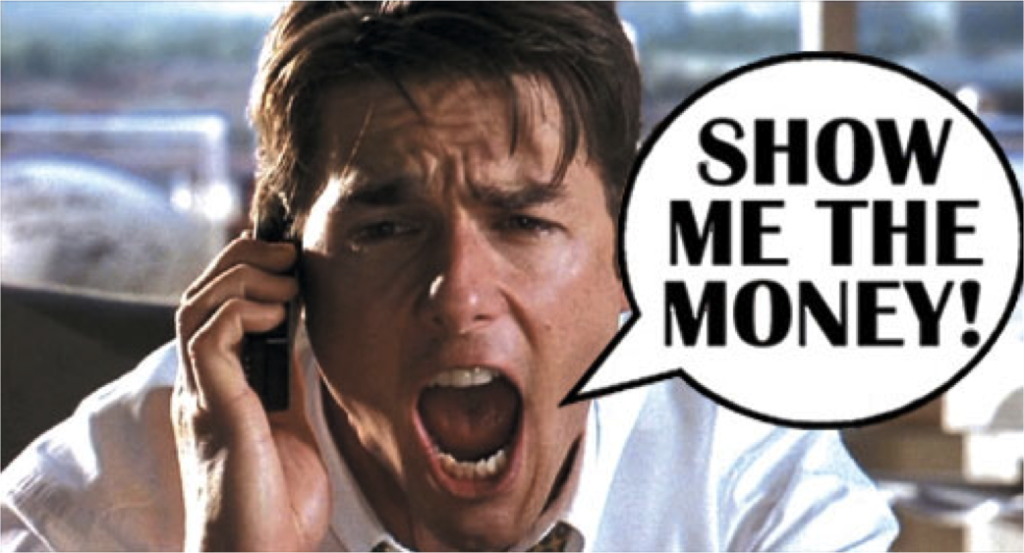

### We want to predict numerical data, so we want to use a linear regression model. However, instead of tuning the model ourselves to determine which variables are significant predictors of our target sales variables, wouldn't it be nice if the computer could do that for us???

### Introducing: LASSO Regression

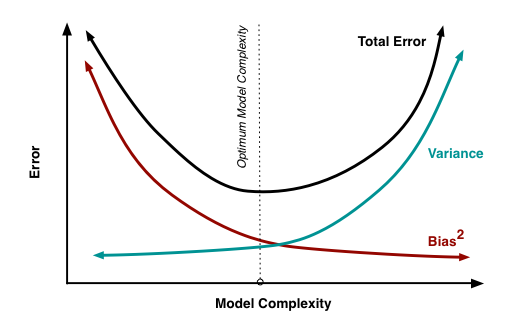

# I Asked The Question: "Which Regional Sales Variable Is Most Predictable Given A Games Platform, Release Year, Genre, and Publisher?"

### I Chose These Variables Specifically Because These Are The Publically Available Ones That Are Listed On The Website That Our Data Comes From.

### Since Our Dataset Is Very Large, I Thought It Would Be A Great Time To Implement Some Concepts In Regression Tuning Such As Train/Test Split and Cross-Validation As These Will Serve To Increase The Validity Of The Results Of Our Model

In [64]:
#Importing Lasso Regression Specific Packages
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

### Our First Model Will Use Platform, Year, Genre, and Publisher To Predict NA_Sales

In [65]:
X1 = df_vg_sales.drop(['Rank','Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis = 1)
y1 = df_vg_sales.NA_Sales

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [66]:
#THIS CELL AND ALL OTHER GRIDSEARCH CELLS ARE COMMENTED OUT TO AVOID EXCESSIVE RUN-TIME

#model1 = Lasso(max_iter = 10000)
# define model evaluation method
#cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42)

# define grid
#grid = dict()
#grid['alpha'] = arange(0.00025, 0.00040, 0.00001)

# define search
#search = GridSearchCV(model1, grid, scoring = 'r2', cv = cv)

# perform the search
#results = search.fit(X_train1, y_train1)

#print('R^2: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [67]:
model_lasso_1 = Lasso(alpha = 0.00025, normalize = False)
model_lasso_1.fit(X_train1, y_train1)

lasso_1_y_hat_test = model_lasso_1.predict(X_test1)

In [68]:
lasso_1_test_mse = mean_squared_error(y_test1, lasso_1_y_hat_test)
lasso_1_test_rmse = np.sqrt(lasso_1_test_mse)
lasso_1_test_mae = mean_absolute_error(y_test1, lasso_1_y_hat_test)
lasso_1_test_r_squared = r2_score(y_test1, lasso_1_y_hat_test)

### Our Second Model Will Use Platform, Year, Genre, and Publisher To Predict EU_Sales

In [69]:
X2 = X1
y2 = df_vg_sales.EU_Sales

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [70]:
#model2 = Lasso(max_iter = 10000)
# define model evaluation method
#cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42)

# define grid
#grid = dict()
#grid['alpha'] = arange(0.00003, 0.00004, 0.000005)

# define search
#search = GridSearchCV(model2, grid, scoring = 'r2', cv = cv)

# perform the search
#results = search.fit(X_train2, y_train2)

#print('R^2: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [71]:
model_lasso_2 = Lasso(alpha = 0.00004, normalize = False)
model_lasso_2.fit(X_train2, y_train2)

lasso_2_y_hat_test = model_lasso_2.predict(X_test2)

In [72]:
lasso_2_test_mse = mean_squared_error(y_test2, lasso_2_y_hat_test)
lasso_2_test_rmse = np.sqrt(lasso_2_test_mse)
lasso_2_test_mae = mean_absolute_error(y_test2, lasso_2_y_hat_test)
lasso_2_test_r_squared = r2_score(y_test2, lasso_2_y_hat_test)

### Our Third Model Will Use Platform, Year, Genre, and Publisher To Predict JP_Sales

In [73]:
X3 = X2
y3 = df_vg_sales.JP_Sales

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3, random_state = 42)

In [74]:
#model3 = Lasso(max_iter = 10000)
# define model evaluation method
#cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42)

# define grid
#grid = dict()
#grid['alpha'] = arange(0.000089, 0.000139, 0.000005)

# define search
#search = GridSearchCV(model3, grid, scoring = 'r2', cv = cv)

# perform the search
#results = search.fit(X_train3, y_train3)

#print('R^2: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [75]:
model_lasso_3 = Lasso(alpha = 0.000094, normalize = False)
model_lasso_3.fit(X_train3, y_train3)

lasso_3_y_hat_test = model_lasso_3.predict(X_test3)

In [76]:
lasso_3_test_mse = mean_squared_error(y_test3, lasso_3_y_hat_test)
lasso_3_test_rmse = np.sqrt(lasso_3_test_mse)
lasso_3_test_mae = mean_absolute_error(y_test3, lasso_3_y_hat_test)
lasso_3_test_r_squared = r2_score(y_test3, lasso_3_y_hat_test)

### Our Fourth Model Will Use Platform, Year, Genre, and Publisher To Predict Other_Sales

In [77]:
X4 = X3
y4 = df_vg_sales.Other_Sales

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.3, random_state = 42)

In [78]:
#model4 = Lasso(max_iter = 10000)
# define model evaluation method
#cv = RepeatedKFold(n_splits = 10, n_repeats = 5, random_state = 42)

# define grid
#grid = dict()
#grid['alpha'] = arange(0.000014, 0.00002, 0.000001)

# define search
#search = GridSearchCV(model4, grid, scoring = 'r2', cv = cv)

# perform the search
#results = search.fit(X_train4, y_train4)

#print('R^2: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [79]:
model_lasso_4 = Lasso(alpha = 0.000014, normalize = False)
model_lasso_4.fit(X_train4, y_train4)

lasso_4_y_hat_test = model_lasso_4.predict(X_test4)

In [80]:
lasso_4_test_mse = mean_squared_error(y_test4, lasso_4_y_hat_test)
lasso_4_test_rmse = np.sqrt(lasso_4_test_mse)
lasso_4_test_mae = mean_absolute_error(y_test4, lasso_4_y_hat_test)
lasso_4_test_r_squared = r2_score(y_test4, lasso_4_y_hat_test)

### Now Let's Compare Our 4 Models And Their Various Scoring Metrics To Evaluate The Answer To Our Original Regression Question

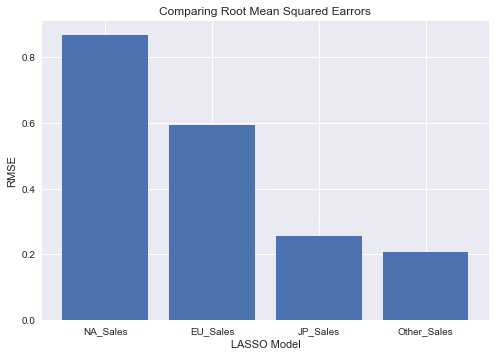

In [81]:
Model = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
RMSE = [lasso_1_test_rmse,lasso_2_test_rmse,lasso_3_test_rmse,lasso_4_test_rmse]

plt.bar(Model, RMSE)
plt.title('Comparing Root Mean Squared Earrors')
plt.xlabel('LASSO Model')
plt.ylabel('RMSE')
plt.show()

### The RMSE's for our models show that North America's sales are the most unpredictable, while other_sales are fairly predictable 

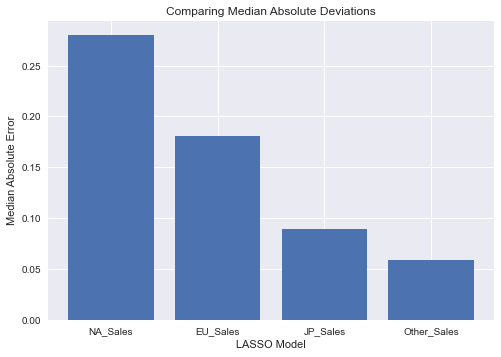

In [82]:
Model = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
MAE = [lasso_1_test_mae, lasso_2_test_mae, lasso_3_test_mae, lasso_4_test_mae]

plt.bar(Model, MAE)
plt.title('Comparing Median Absolute Deviations')
plt.xlabel('LASSO Model')
plt.ylabel('Median Absolute Error')
plt.show()

### Again, North American sales are the most unpredictable, and Other Sales are the most predictable.

### Let's Also Compare R^2 Values

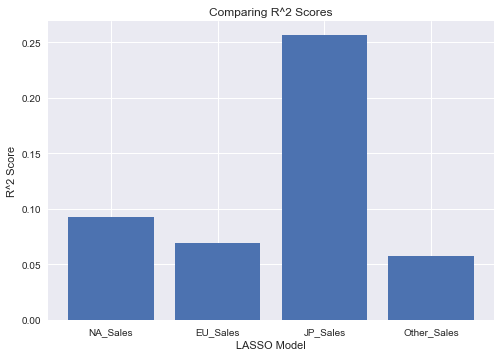

In [83]:
Model = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
R2 = [lasso_1_test_r_squared,lasso_2_test_r_squared,lasso_3_test_r_squared,lasso_4_test_r_squared]

plt.bar(Model, R2)
plt.title('Comparing R^2 Scores')
plt.xlabel('LASSO Model')
plt.ylabel('R^2 Score')
plt.show()

### By R^2 Score, It is Clear To See That Japan Has the Highest % Of Variability Explained By The LASSO Model, And Therefore Has The Most Predictable Sales Based On Year, Publisher, Platform, and Genre.

### Admitedly, this isn't a great model. Ask anyone in Sales and Marketing, and they'll tell you that sales of a product aren't determined by brand alone.

### Here's Our List Of Regression Coefficients For Each Model

In [84]:
#Creating a dataframe of all of the lasso regression coefficients
lasso_coef_1 = model_lasso_1.fit(X_train1, y_train1).coef_
df_lasso_1 = pd.DataFrame([lasso_coef_1])

#Formatting the dataframe of variables with labels and transposing it.
names = X_train1.columns
df_lasso_1.columns = names
df_lasso_1 = df_lasso_1.T
df_lasso_1=df_lasso_1.rename(columns = {0:'NA_Sales_Coef'})

lasso_coef_2 = model_lasso_2.fit(X_train2, y_train2).coef_
df_lasso_2 = pd.DataFrame([lasso_coef_2])

#Formatting the dataframe of variables with labels and transposing it.
names = X_train2.columns
df_lasso_2.columns = names
df_lasso_2 = df_lasso_2.T
df_lasso_2=df_lasso_2.rename(columns = {0:'EU_Sales_Coef'})

lasso_coef_3 = model_lasso_3.fit(X_train3, y_train3).coef_
df_lasso_3 = pd.DataFrame([lasso_coef_3])

#Formatting the dataframe of variables with labels and transposing it.
names = X_train3.columns
df_lasso_3.columns = names
df_lasso_3 = df_lasso_3.T
df_lasso_3=df_lasso_3.rename(columns = {0:'JP_Sales_Coef'})

lasso_coef_4 = model_lasso_4.fit(X_train4, y_train4).coef_
df_lasso_4 = pd.DataFrame([lasso_coef_4])

#Formatting the dataframe of variables with labels and transposing it.
names = X_train4.columns
df_lasso_4.columns = names
df_lasso_4 = df_lasso_4.T
df_lasso_4=df_lasso_4.rename(columns = {0:'Other_Sales_Coef'})


df_lasso_1 = pd.concat([df_lasso_1,df_lasso_2], axis=1)
df_lasso_1 = pd.concat([df_lasso_1,df_lasso_3], axis=1)
df_lasso_1 = pd.concat([df_lasso_1,df_lasso_4], axis=1)

df_lasso = df_lasso_1

df_lasso.round(5)

NA_Sales_Coef  EU_Sales_Coef  JP_Sales_Coef  \
Year                                 -0.02213       -0.00639       -0.00432   
Platform_2600                        -0.02770       -0.18683       -0.11670   
Platform_3DO                         -0.00000       -0.00000       -0.00000   
Platform_3DS                          0.02346        0.03253        0.05708   
Platform_DC                          -0.09147       -0.07658        0.03894   
...                                       ...            ...            ...   
Publisher_id Software                 0.00000        0.00000        0.00000   
Publisher_imageepoch Inc.             0.00000        0.00000       -0.00000   
Publisher_inXile Entertainment        0.00000        0.00000       -0.00000   
Publisher_mixi, Inc                   0.00000        0.00000        0.00000   
Publisher_responDESIGN                0.00000        0.00000        0.00000   

                                Other_Sales_Coef  
Year                                    -0.00079  
Platform_2600                           -0.03447  
Platform_3DO                             0.00000  
Platform_3DS                             0.00276  
Platform_DC                             -0.00981  
...                                          ...  
Publisher_id Software                    0.00000  
Publisher_imageepoch Inc.                0.00000  
Publisher_inXile Entertainment           0.00000  
Publisher_mixi, Inc                      0.00000  
Publisher_responDESIGN                   0.00000  

[622 rows x 4 columns]

# What Does This Tell Us About The 4 Sales Regions Identified (North America, Europe, Japan, and Other?

It's pretty fair to say that Japan's Consumers have the most predictable sales based on the predictors used. This might be attributed to the historical role that Video Games have played in Japan's culture and economy since the 1980's (See: Nintendo). It also suffices to say that the North American sales being the most unpredictable according to our models suggests that the American video game consumers are less likely to purchase a game simply because of it's publisher, platform, genre, and year of release. While this might not jive with the notion of people buying the new Call of Duty every year regardless of the actual enjoyability of the new release, it does make sense when you think about the tiers of games below these AAA titles. In Japan, developers might release many so-deemd "cult" games that will chart in our data w/ >100k sales, but in the States, these fad-type games are more likely to be free-to-play (think Fortnite or Rocket League), or mobile games which aren't represented in this data (Flappy Bird to name a game in particular).

# Conclusion

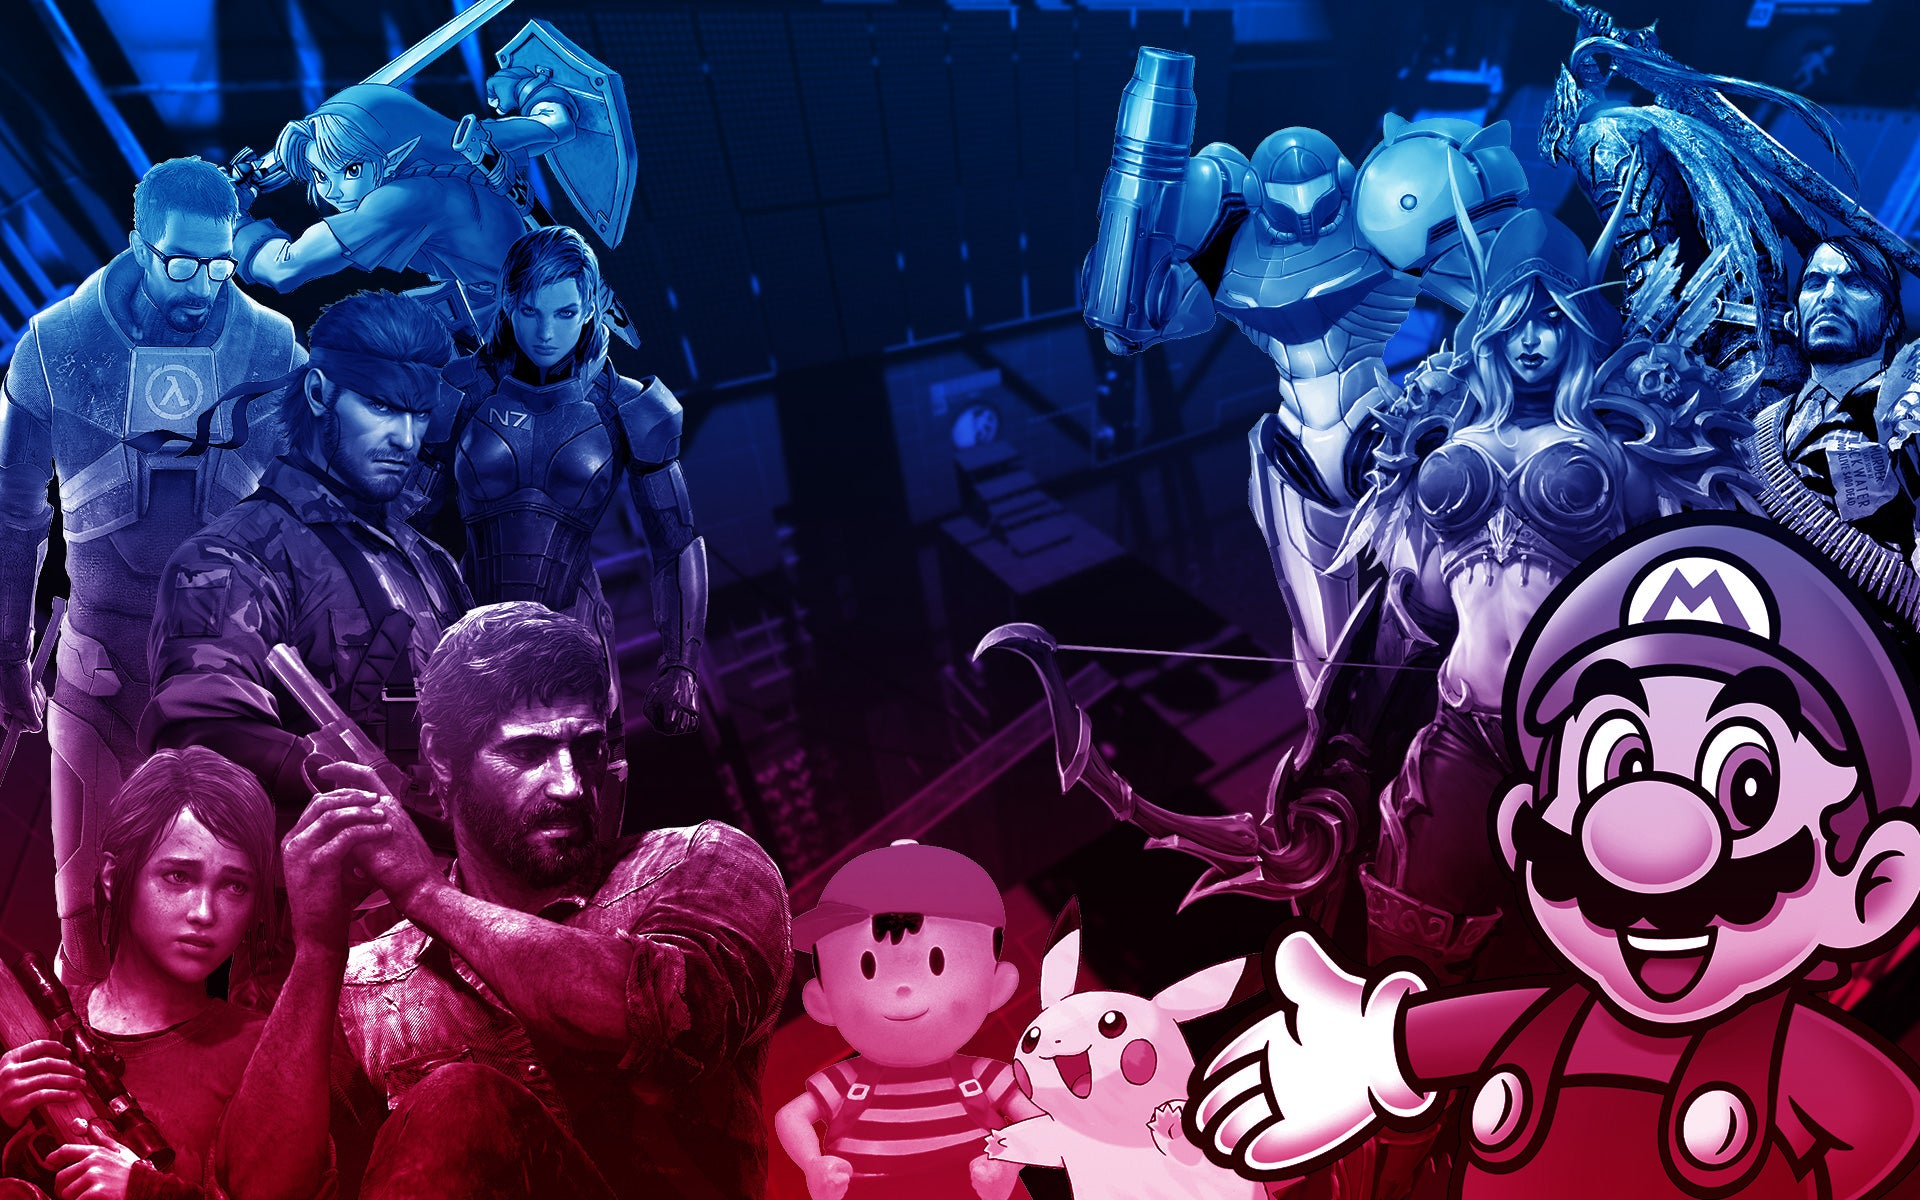

#### We've Shown You How We Obtained Our Data, Cleaned the Data, Visualized Several Different Trends For the 4 Different Sales Regions, and Even Determined Via A LASSO Predictive Regression Model That Japan's Market Is Much More Predictable Than Other Markets

# Let's Remember a Few of Our Graphical Conclusions About Our Data

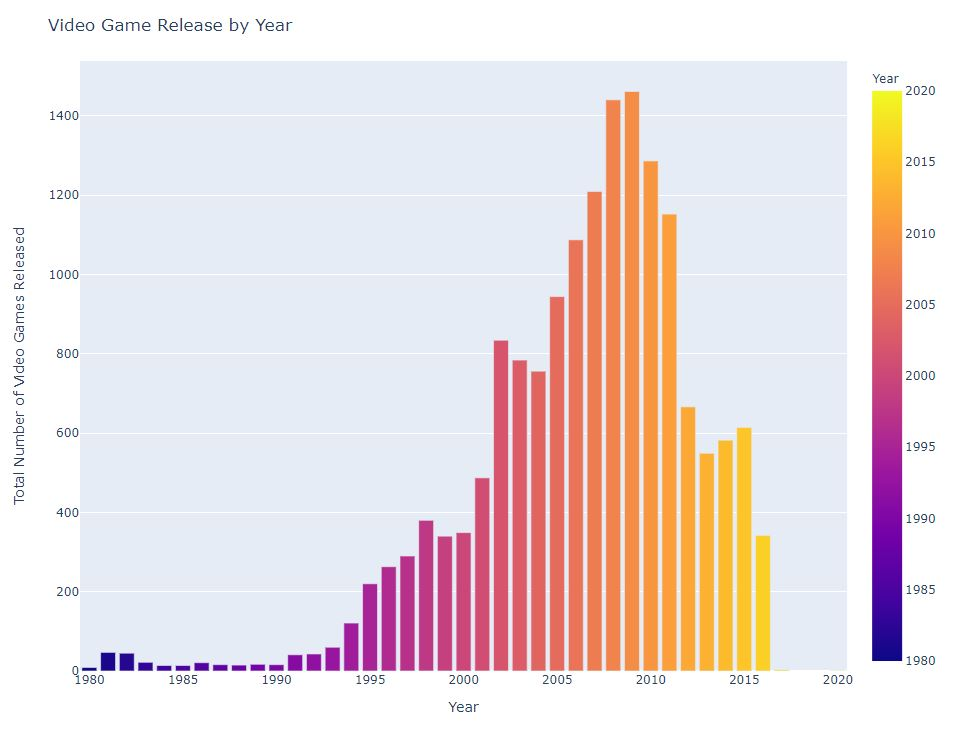

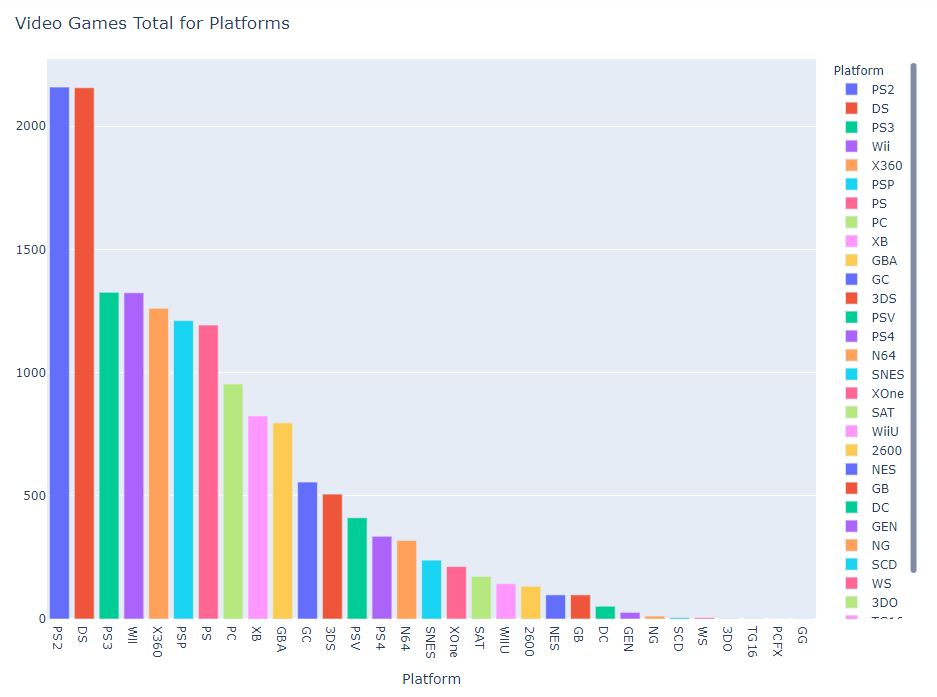

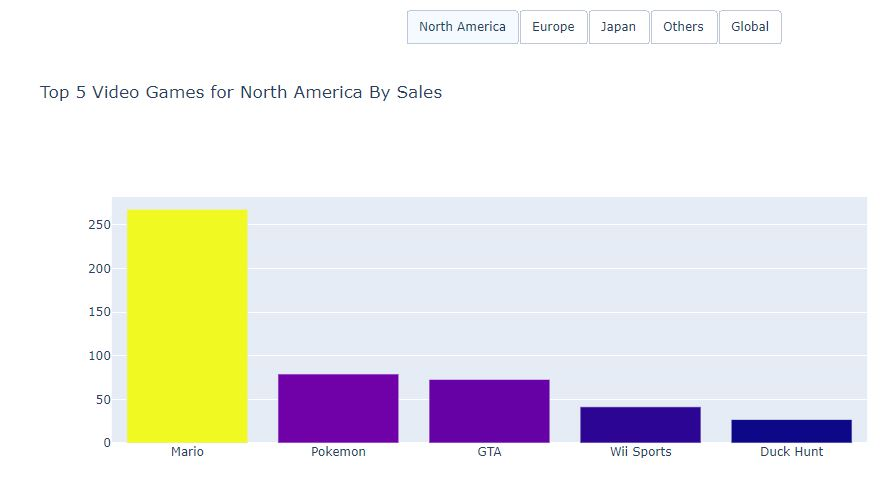

# Thank You For Your Time